In [18]:
%matplotlib inline

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
IMAGE_PATHS = '/home/msc1/Desktop/tagging/public/birdtask/test_images'



In [20]:
PATH_TO_MODEL = "/home/msc1/Desktop/tagging/public/birdtask/train/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [21]:
PATH_TO_MODEL_DIR = '/home/msc1/Desktop/tagging/public/birdtask/train/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model'.format (PATH_TO_MODEL)

In [22]:
print(PATH_TO_MODEL_DIR)

/home/msc1/Desktop/tagging/public/birdtask/train/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model


In [23]:
PATH_TO_LABELS = '/home/msc1/Desktop/tagging/public/birdtask/data/label_map.pbtxt'

In [24]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 5.734098434448242 seconds


In [25]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_16.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_66.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_51.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_6.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_58.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_24.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_55.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_72.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/inference_61.jpg... Done
Running inference for /home/msc1/Desktop/tagging/public/birdtask/test_images/infere

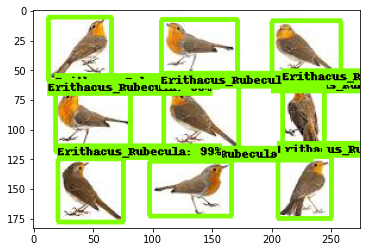

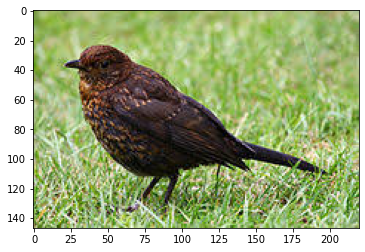

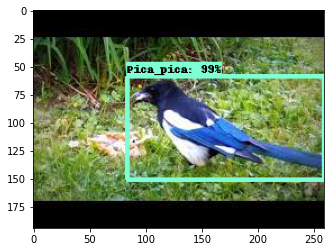

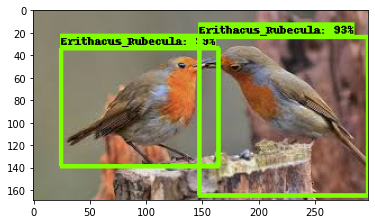

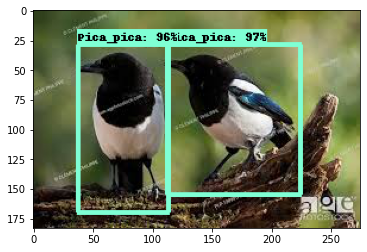

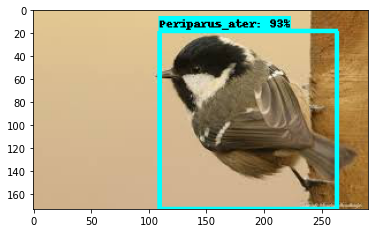

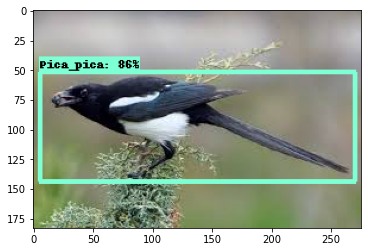

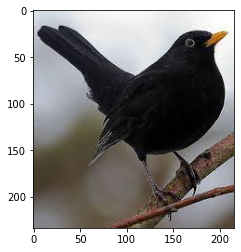

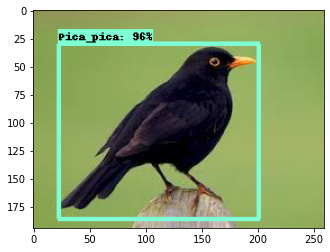

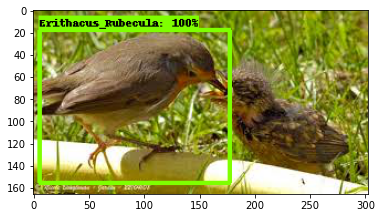

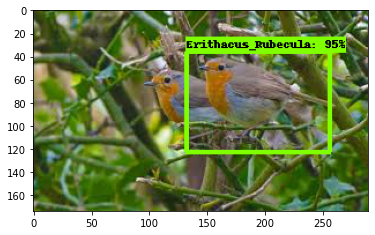

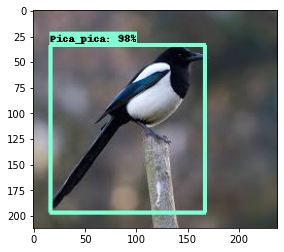

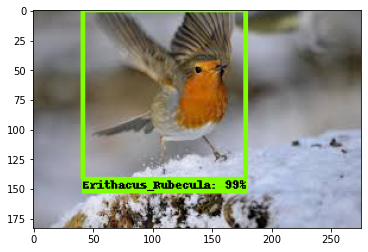

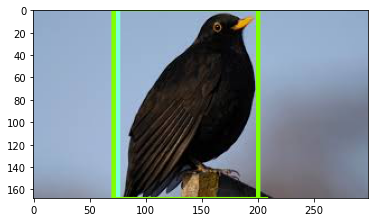

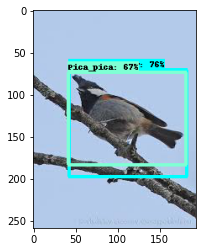

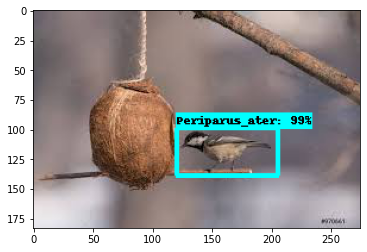

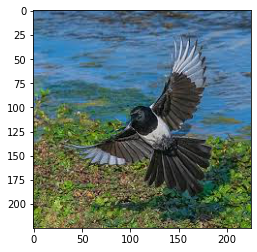

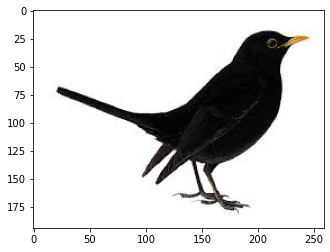

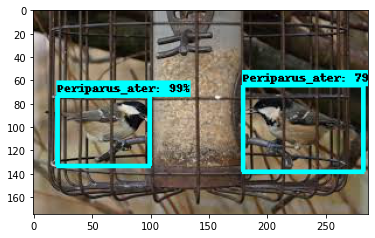

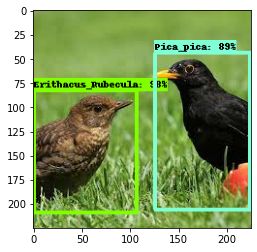

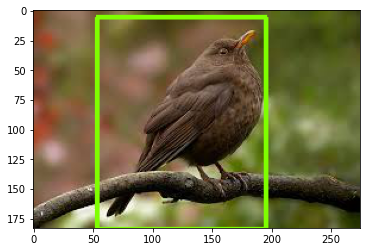

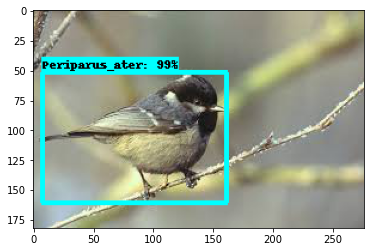

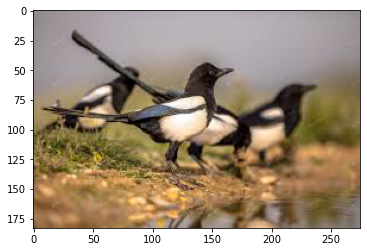

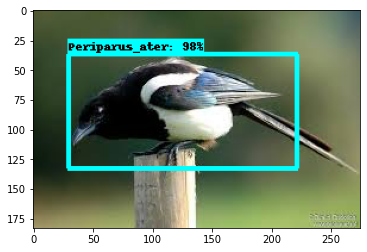

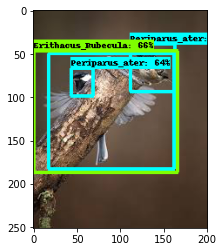

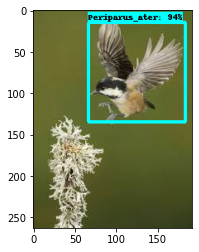

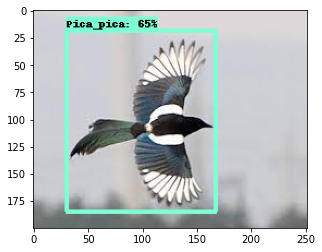

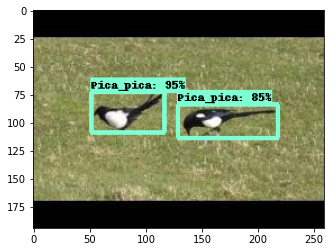

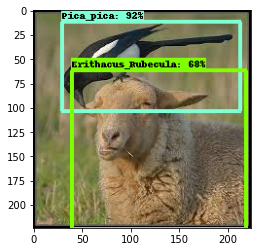

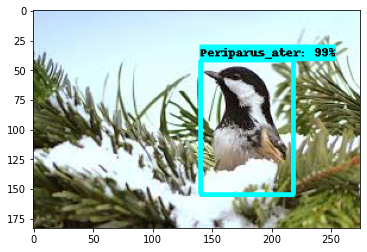

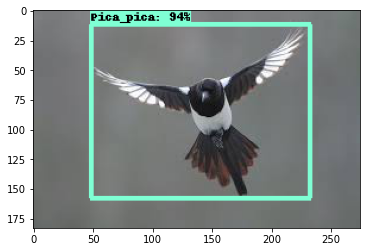

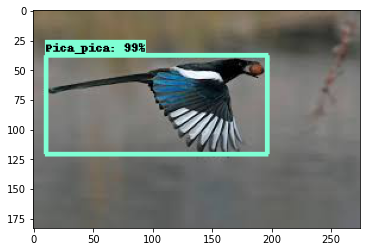

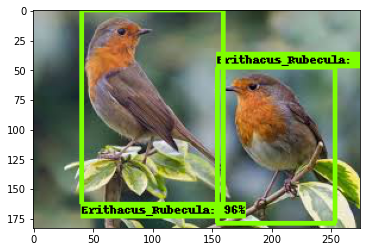

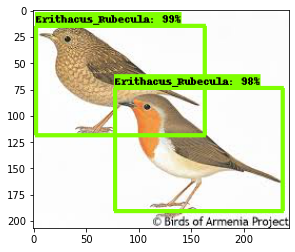

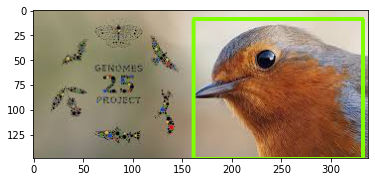

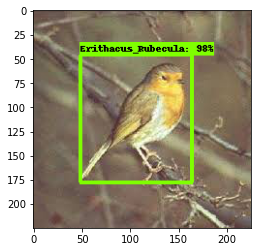

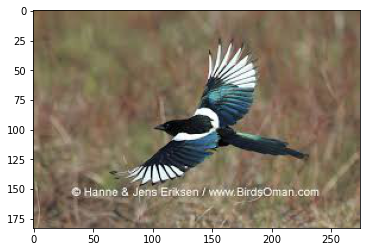

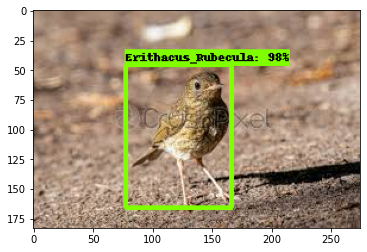

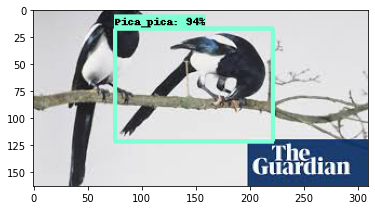

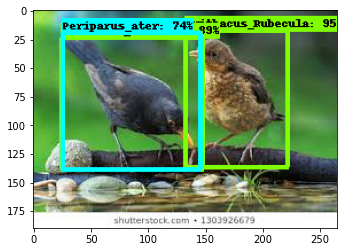

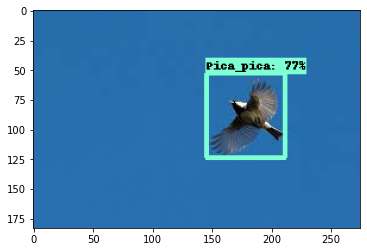

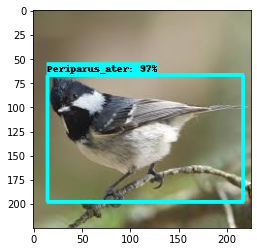

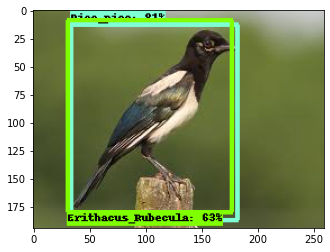

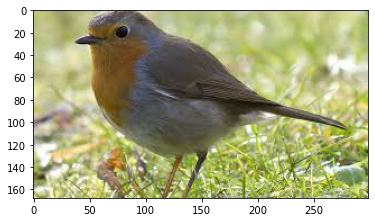

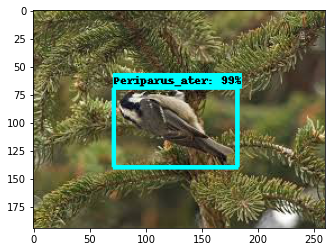

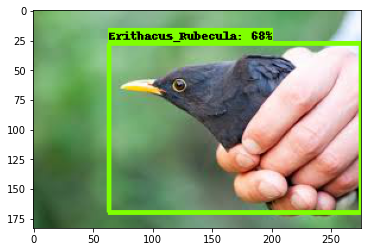

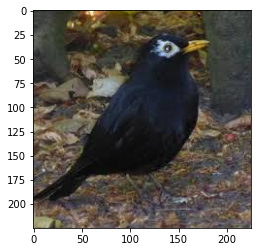

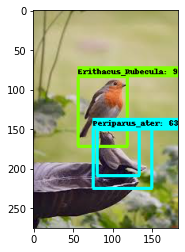

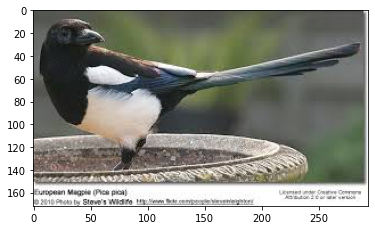

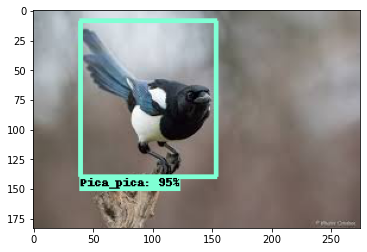

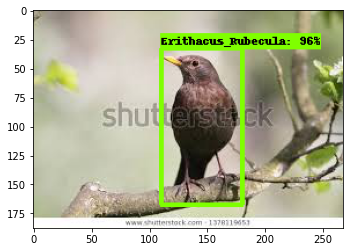

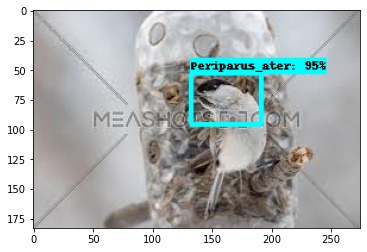

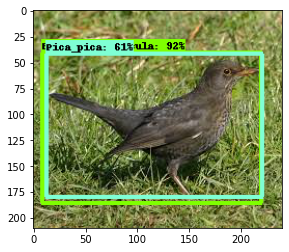

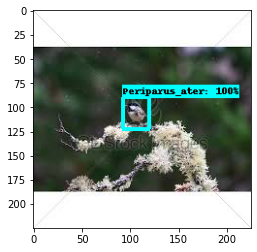

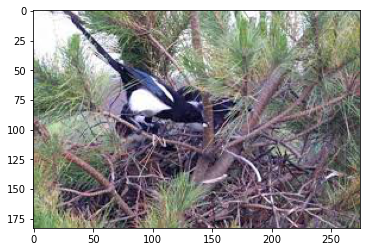

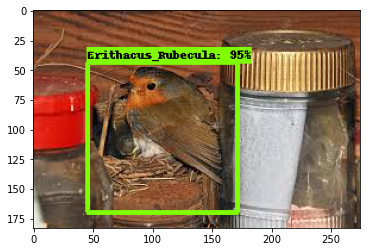

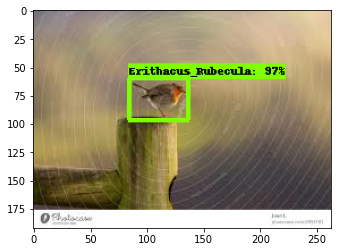

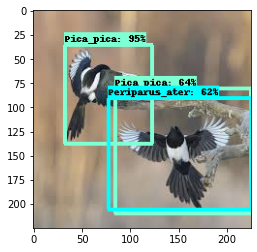

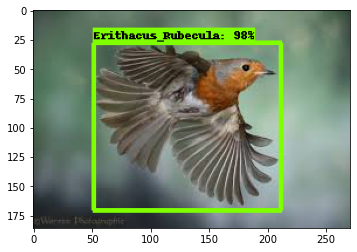

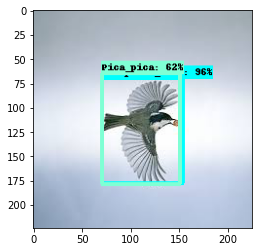

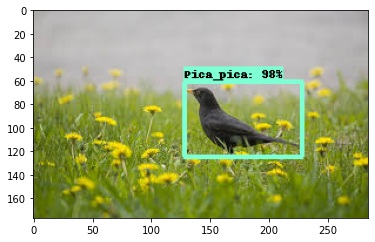

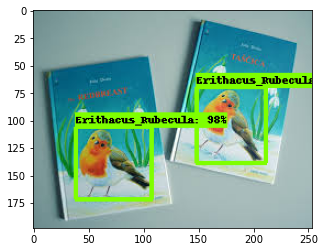

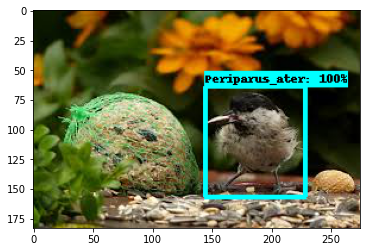

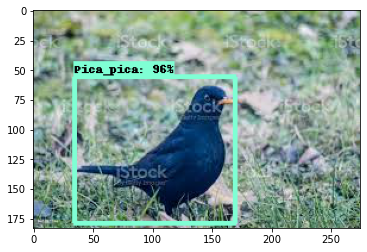

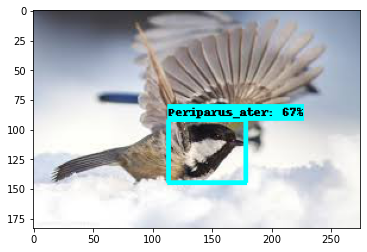

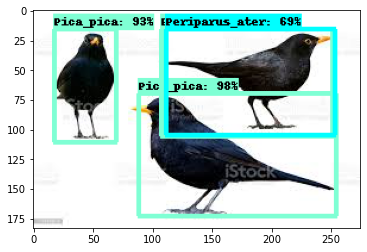

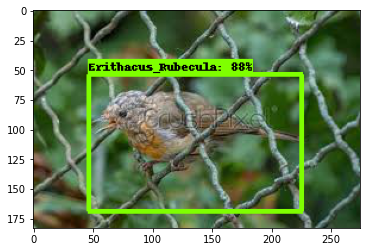

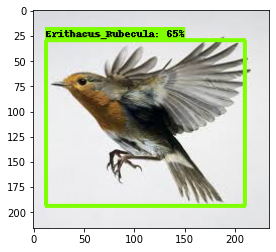

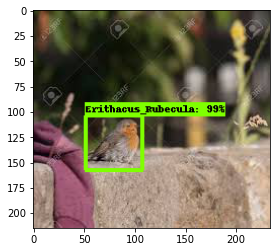

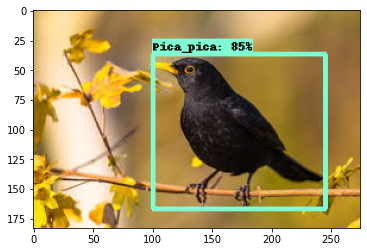

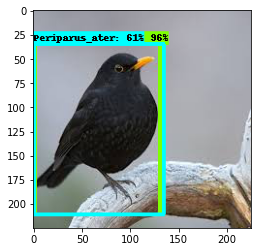

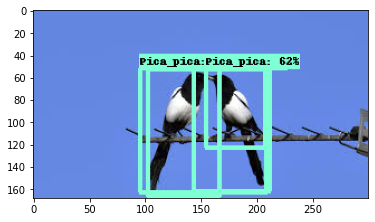

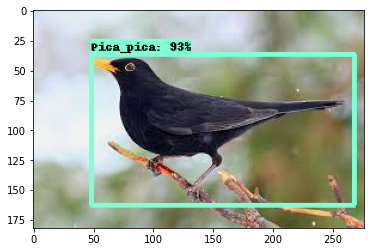

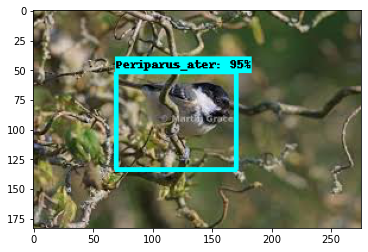

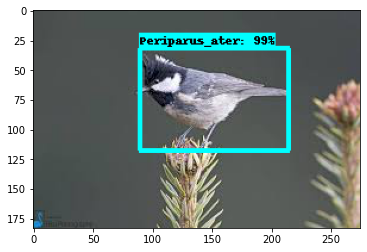

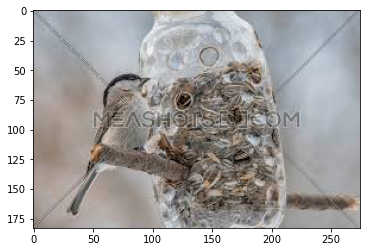

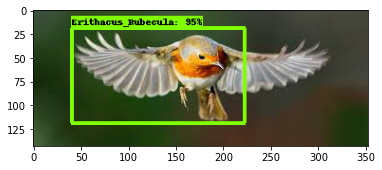

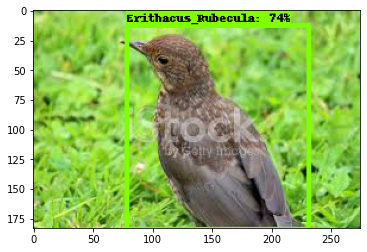

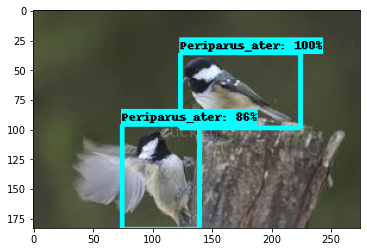

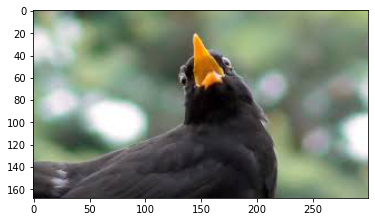

In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))





for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    
    
    print('Running inference for {}... '.format(image_path), end='')
    
    image_np = load_image_into_numpy_array(image_path)
    
    input_tensor = tf.convert_to_tensor(image_np)
    
    input_tensor = input_tensor[tf.newaxis, ...]
    
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=.60,
          agnostic_mode=False)
    
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    
plt.show()
   

    

In [10]:
%matplotlib inline

We can see an inference was done on new birds images, in order to check if the trained model is performing the right way.The dataset for the inference contains 4 different classes. When the images is clear and  is in a optimal posistion the model is able to predict a high pencentage of the bird specie in fact the model predicted 31 out of 34 eritharus birds in the inference dataset. The set up of inference will let the model to predict birds only the pencentage is higher than 60 %. The second class(periparus bird) we had 18 out 23 birds, which is a good result. The third class(pica pica) had also a good aswell because the model was able to predict 22 birds out the 27 selected. 
The rest of the dataset contains a different class which was not included in model. Overall we can say that the fastercnn model performed very well on this type of dataset, and also the hyperparameter was setup in right way to meet the requirements.